<a href="https://colab.research.google.com/github/Mohinee29/Haberman-cancer-survival/blob/main/Pandas_Cancer_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CANCER SURVIVAL DATA ANALYSIS

###LOADING DATA SET

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

###LOADING DATASET

In [3]:
df = pd. read_csv ("https://raw.githubusercontent.com/Mohinee29/Haberman-cancer-survival/main/haberman_cancer.csv")
df_yes = df.loc[df["status"]== 1]
df_no = df.loc[df["status"] ==2]


###DATA AUDIT


In [4]:
#Display first few rows
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
#Display last few rows
df.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [6]:
df.shape

(306, 4)

OBSERVATION : The data set contains 306 rows and 4 columns

In [7]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

OBSERVATION : 
     There are 4 attributes/features in the data set:
   
    - AGE of the patinet at the time of surgery

    - Year of surgery between between 1958 and 1970

    - Nodes: Number of positive nodes

    - Status : 1/2 - 1 indicating the person survived 5 years or longer after surgery and 2 indicating the person died within 5 years of surgery 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


OBSERVATION :

       -The mean age of patinets is 52 years, maximum age being 83 years and minimum age is 30 years.

       -Maximum nodes in a patinet is 52 while minimum nodes is 0.

       -The dataset has a collection of data of patient undergone cancer surgery in year 1958-1969.

        -Almost 75% of the patient had  <= 4 axil nodes where 25% of them had 0 node and very few had up to 52 axil nodes.

#EDA

## UNIVARIATE ANALYSIS

###STATUS ATTRIBUTE

In [10]:
#give number of counts in each of 1 and 2 status values
df["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

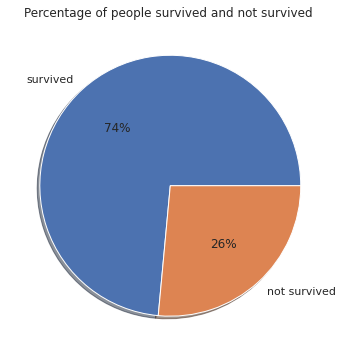

In [41]:
status_count = df["status"].value_counts()
labels=["survived","not survived"]
plt.figure(figsize=(6,6))
plt.pie(status_count,labels= labels,autopct= "%1.0f%%",shadow = True)
plt.title("Percentage of people survived and not survived ")
plt.show()

OBSERVATION :

In the given data set 74% (225) of the patients survived 5 years or more after surgery and 26% (81) of the patients did not survive even 5 years.

###AGE ATTRIBUTE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: age, dtype: float64

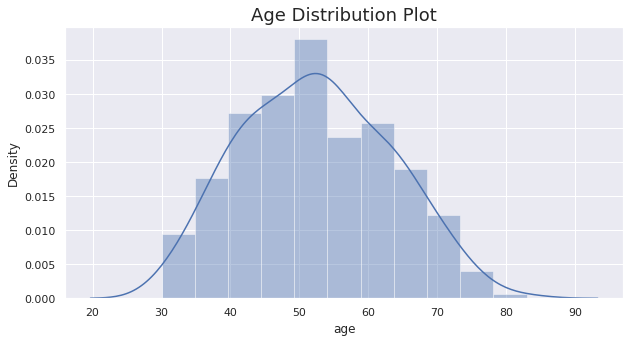

In [12]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.distplot(df["age"])
plt.title('Age Distribution Plot', fontsize=18)
df["age"].describe()

OBSERVATION :

      - 75 % of the patients have age 30 to 60 and 25 % of the patinets have age 30 to 44 years
      - Maximum age - 83 yrs 
      -Minimum age - 30 yrs

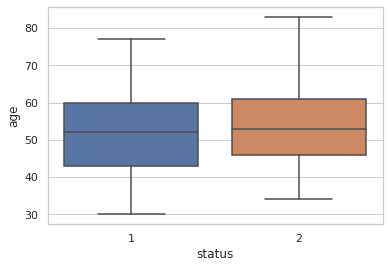

In [48]:
#BOX plot for age attribute
sns.boxplot(x='status',y='age', data=df)
plt.show()

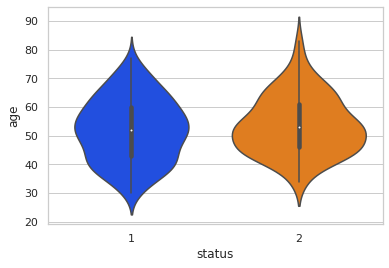

In [49]:
#Violin Plot for age attribite
sns.violinplot(x="status", y="age", data=df, size=8,palette="bright")
plt.show()

OBSERVATION :

- More people in the age group 30-40 survived after surgery
-Most of the people in the age group more than 70 did not survive

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


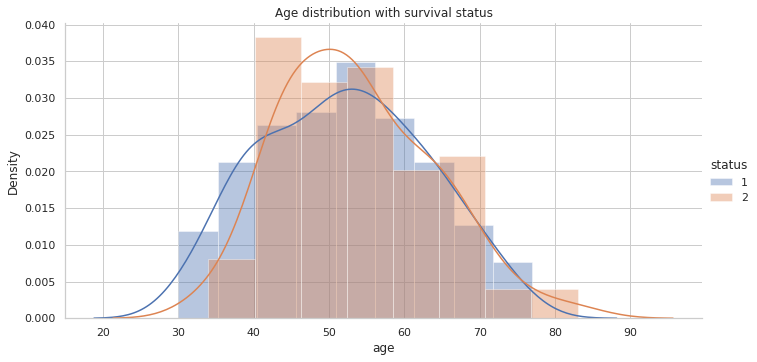

In [50]:
sns.FacetGrid(df, hue="status", size=5,aspect = 2) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Age distribution with survival status")
plt.show();

OBSERVATION :

-Both the classes(surviving and dying) are majorly overlapped with respect to age attribute and hence is is diificult to determine the  "status" whether the patinet will survive or not based on the age attribute.

- The only observation that can be made is patients with age less than 40 yrs has higher chance to survive and patient with age more than 78 yrs are most likely to die after surgery

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


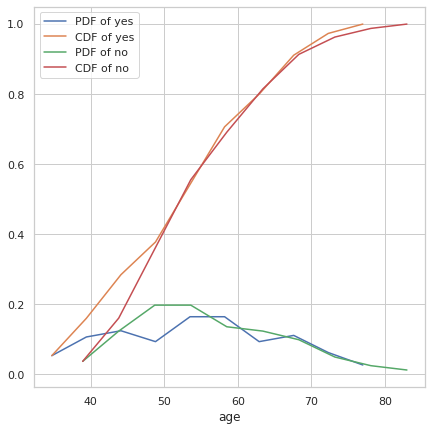

In [51]:
plt.figure(figsize=(7,7))

# PDF for ages who survived
counts, bin_edges = np.histogram(df_yes['age'], bins=10, density = True)
                              
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF for ages who survived
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of yes")
plt.plot(bin_edges[1:], cdf,label="CDF of yes")


# PDF for ages who died
counts, bin_edges = np.histogram(df_no['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF for ages who died
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of no")
plt.plot(bin_edges[1:], cdf,label="CDF of no")

plt.xlabel("age")
plt.legend()
plt.show();

OBSERVATION :
 
 -Patient with age between age 30-36 has survived the surgery and   pataient aged 75-85 has minimal chances of surviving 

###YEAR ATTRIBUTE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: year, dtype: float64

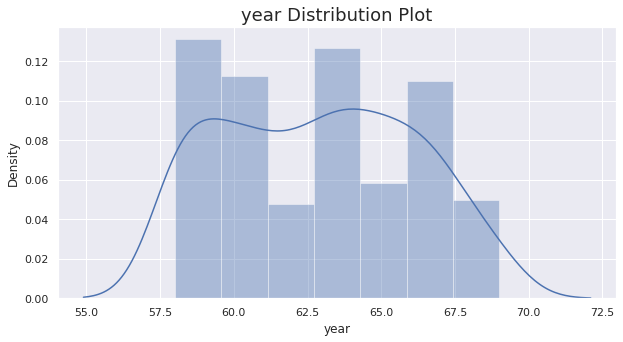

In [19]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.distplot(df["year"])
plt.title('year Distribution Plot', fontsize=18)
df["year"].describe()

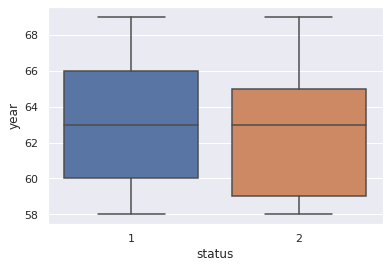

In [20]:
sns.boxplot(x='status',y='year', data=df)
plt.show()

OBSERVATION :

- Most of the people having surgery in 1959-1960 couldnot survive while most of the people having surgery in 1965-1966 survived after surgery

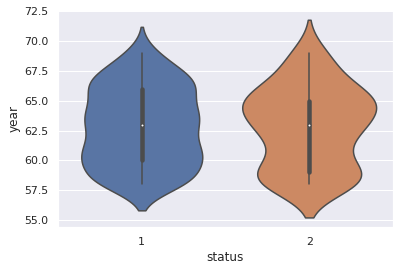

In [21]:
sns.violinplot(x="status", y="year", data=df, size=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


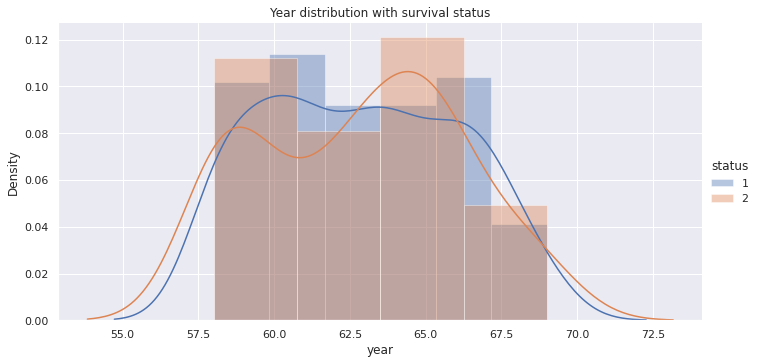

In [22]:
sns.FacetGrid(df, hue="status", size=5,aspect = 2) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Year distribution with survival status")
plt.show();

OBSERVATION :
  
  -The surgery between 1960 to 1963 were higher in chances of survival and the surgeries between 1963 to 1966 had lower chnaces of survival

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


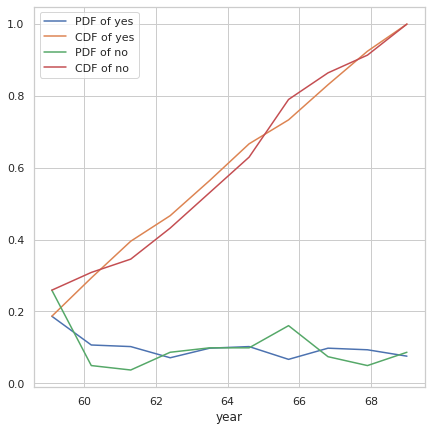

In [36]:
plt.figure(figsize=(7,7))

counts, bin_edges = np.histogram(df_yes['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of yes")
plt.plot(bin_edges[1:], cdf,label="CDF of yes")


counts, bin_edges = np.histogram(df_no['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of no")
plt.plot(bin_edges[1:], cdf,label="CDF of no")

plt.xlabel("year")
plt.legend()
plt.show();

OBSERVATION :

- No clear insights can be drwan from the year data as both survival CDF and not survival CDF are highly overlapping.

###NODES ATTRIBUTE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: nodes, dtype: float64

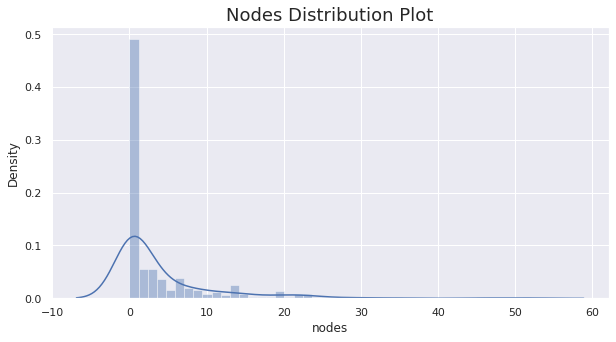

In [24]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.distplot(df["nodes"])
plt.title('Nodes Distribution Plot', fontsize=18)
df["nodes"].describe()

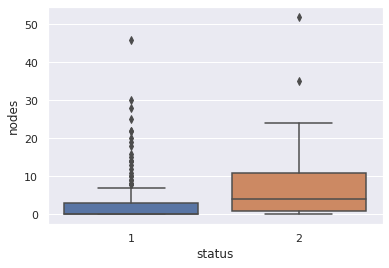

In [25]:
sns.boxplot(x='status',y='nodes', data=df)
plt.show()

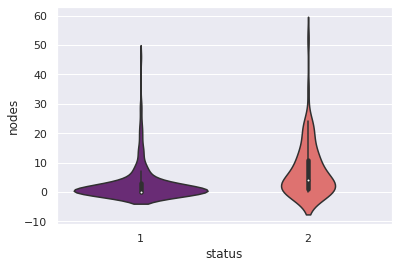

In [26]:
sns.violinplot(x="status", y="nodes", data=df, size=10,palette="magma")
plt.show()

OBSERVATION :

- The violin plot clearly shows a denser picture for survival in the node 0-2
- The patinets having nodes more than 20 have comparetly less chances of surviving

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


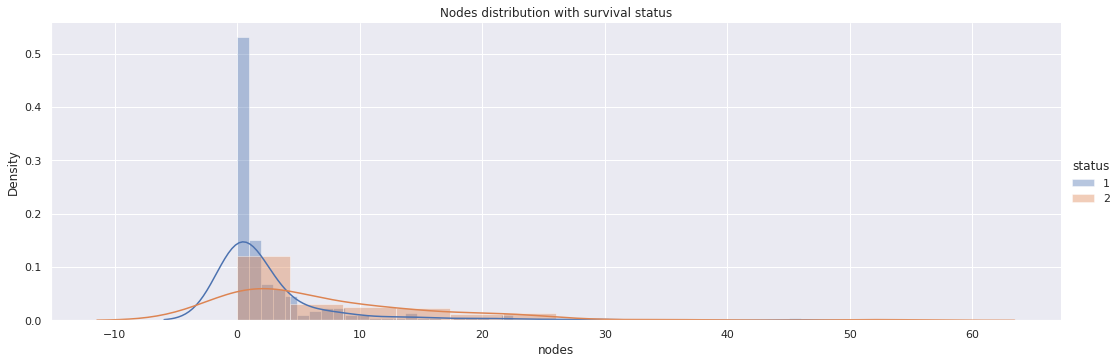

In [27]:
sns.FacetGrid(df, hue="status", size=5,aspect = 3) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Nodes distribution with survival status")
plt.show();

OBSERVATION :

 -90% of the patient has nodes between 0 to 20
 
 -Patient with 0-5  nodes have higher chances of survival.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


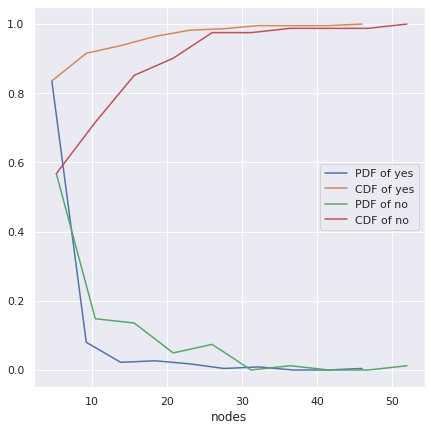

In [28]:
plt.figure(figsize=(7,7))

counts, bin_edges = np.histogram(df_yes['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of yes")
plt.plot(bin_edges[1:], cdf,label="CDF of yes")


counts, bin_edges = np.histogram(df_no['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of no")
plt.plot(bin_edges[1:], cdf,label="CDF of no")

plt.xlabel("nodes")
plt.legend()
plt.show();

OBSERVATION:

- 59% Of the patinets having nodes less than 5 did not survive 
- 82% of the patinets having nodes less than 4 survived 

##BIVARIATE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


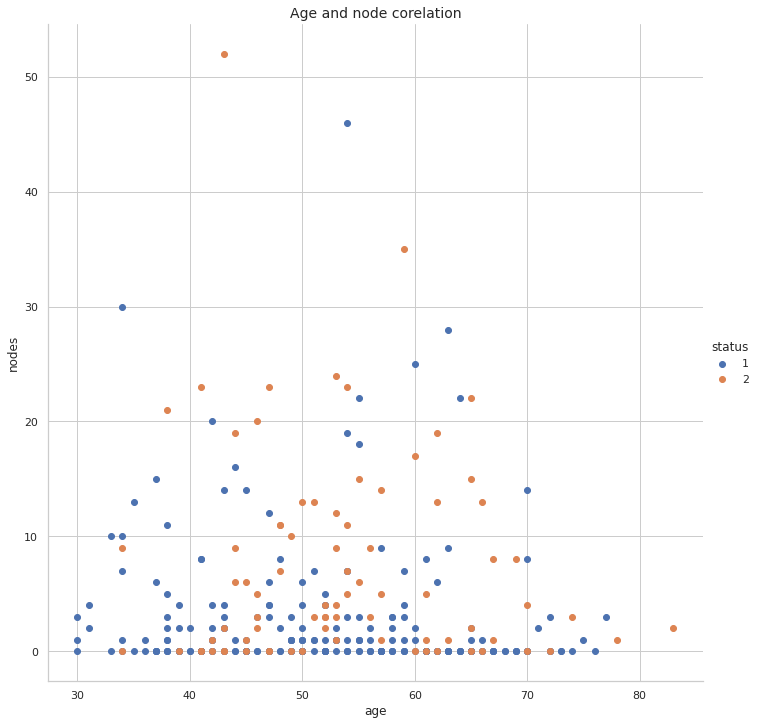

In [35]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=10) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("Age and node corelation",size = 14)
plt.show();

OBSERVATION :

-Most of the patinets having 0 nodes in all age group survived 

-Most of the patinets having more than 20 nodes could not survive

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


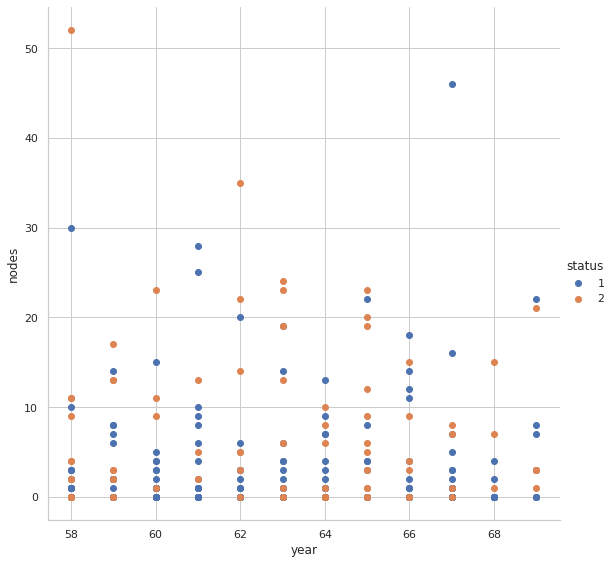

In [30]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=8) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();

OBSERVATION :

-No clear corelation could be observed 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


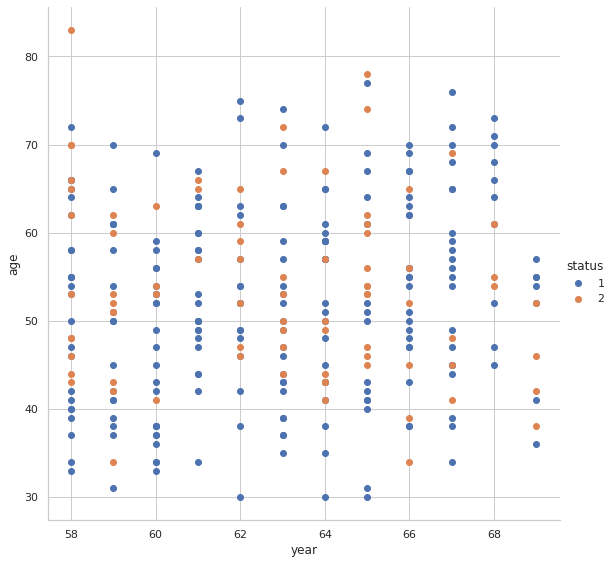

In [31]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=8) \
   .map(plt.scatter, "year", "age") \
   .add_legend();
plt.show();

OBSERVATION :

-No clear corelation could be observed

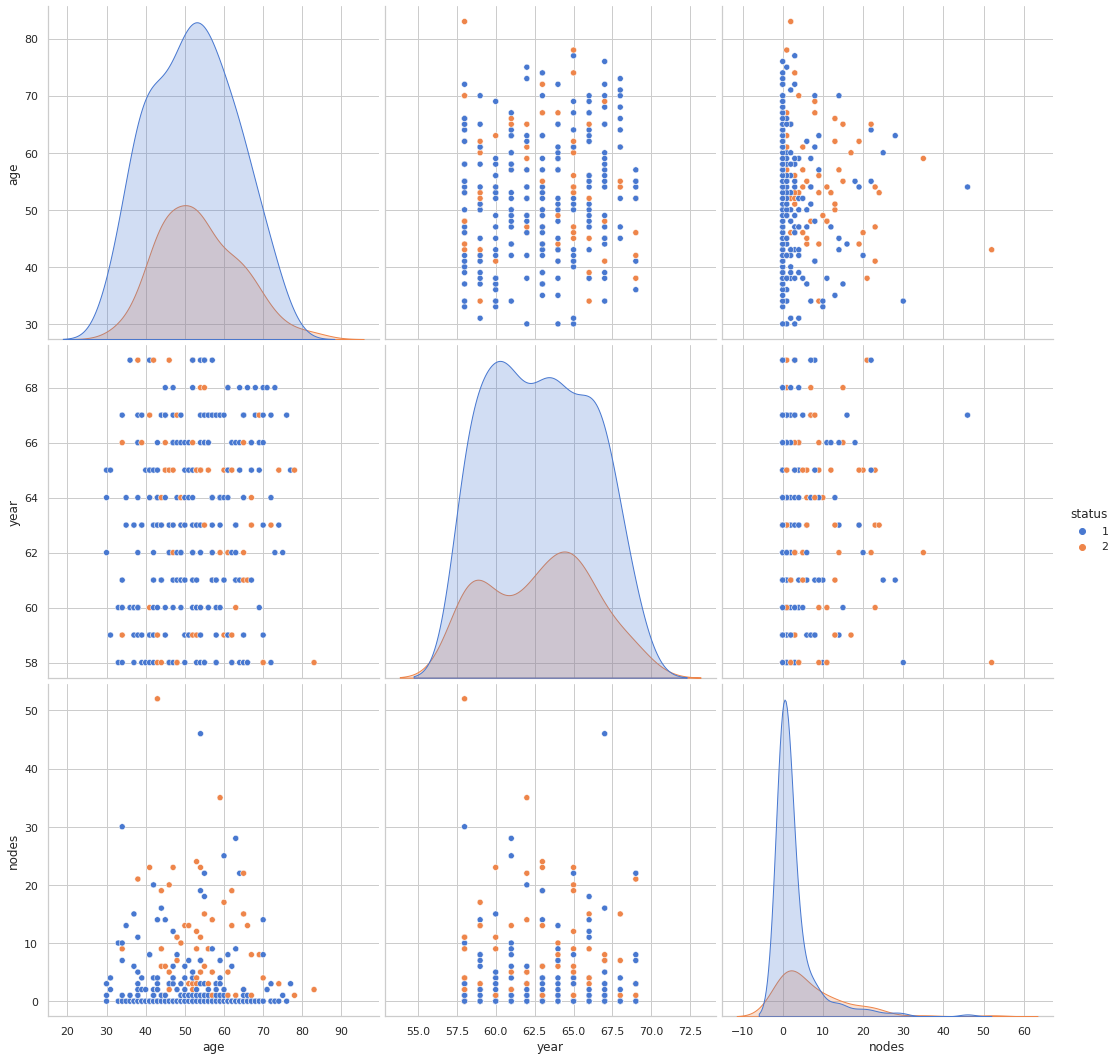

In [32]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", height=5,palette="muted");
plt.show()

OBSERVATION:

- no corelation is good enough in this pair plot to draw a conclusion.
- Plot between age and node is comparatevely gives a good analysis.

###MULTIVARIATE ANALYSIS

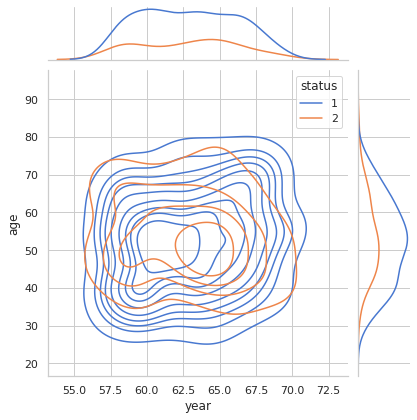

In [56]:
sns.jointplot(x = "year", y = "age", data = df, kind = "kde",hue="status",palette="muted")
plt.show()

OBSERVATION :

- The patinets between age group 45-59 and year of surgery in between 1959-1963 had higher chances of survival
- The patinets between age group 45-59 and year of surgery in between 1964-1966 had lower chances of survival

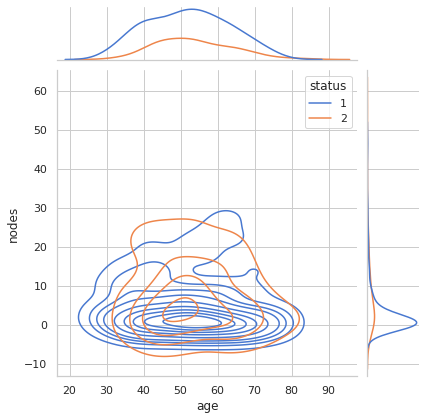

In [54]:
sns.jointplot(x = "age", y = "nodes", data = df,kind = "kde" ,hue="status",palette="muted")
plt.show()

OBSERVATION :

- no clear observation could be drawn


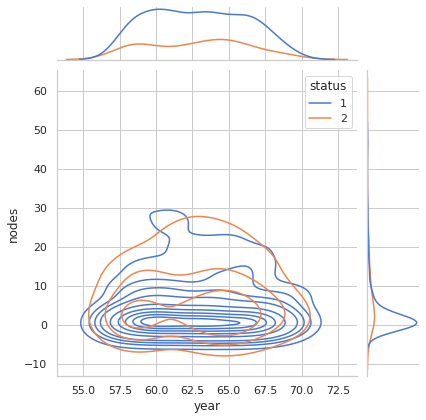

In [55]:
sns.jointplot(x = "year", y = "nodes", data = df, kind = "kde",hue="status",palette="muted")
plt.show()

OBSERVATION :

- No clear observation could be drawn